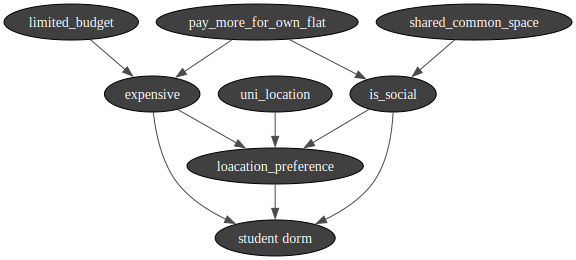

IndexError: Shape of '[0.8 0.1 0.1]' is not '(3, 3)'

In [7]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from utils import Dorms

class inferenceEngine:
    
    def __init__(self): 
        bn = gum.BayesNet('Student Dorms')
        dorm_1 = Dorms("1", "Bismarkstrasse 4", "Bonn", "46 Single room in shared flat, 8 Double-Apartments", "Single room: 289,00 - 436,00 euros, Double-Apartement: 507,00 - 812,00 euros")
        dorm_2 = Dorms("2", "Drussusstrasse 17", "Bonn", "73 Apartements", "245,00 - 642,00 euros")
        dorm_3 = Dorms("3", "Europaring 2", "Sankt Augustin", "49 Apartements", "346,00 - 493,00 euros")
        dorm_4 = Dorms("4", "StuHaus", "Sankt Augustin", "106 Double/Shared Apartments, 60 Single-Apartments", "Double Apartment: 395 - 413 euros Single Apartment: 493 - 496 euros")
        dorm_5 = Dorms("5", "Keramikerstrasse 38", "Rheinbach", "30 Apartments ", "336,00 - 472,00 euros")
        dorm_6 = Dorms("6", "Wg_gesucht", "Rheinbach", "Single room in shared flat", "400 - 500 euros" )

        limited_budget = bn.add(gum.LabelizedVariable('limited_budget', 'Limited Budget', ['True', 'False']))
        pay_more_for_own_flat = bn.add(gum.LabelizedVariable('pay_more_for_own_flat', 'Pay more for own flat', ['True', 'False']))
        shared_common_space = bn.add(gum.LabelizedVariable('shared_common_space', 'Shared Common Space', ['True', 'False']))
        uni_location = bn.add(gum.LabelizedVariable('uni_location', 'University location', ['Uni Bonn','HBRS Sankt Augustin','HBRS Rheinbach']))
        expensive = bn.add(gum.LabelizedVariable('expensive', 'Expensive', ['True', 'False']))
        loc_pref = bn.add(gum.LabelizedVariable('loacation_preference', 'Location Preference', ['Bonn', 'Sankt Augustin', 'Rheinbach']))
        is_social = bn.add(gum.LabelizedVariable('is_social', 'Is Social', ['True', 'False']))
        stud_d = bn.add(gum.LabelizedVariable('student dorm', 'student dorm', ['Bonn', 'Sankt Augustin', 'Rheinbach']))
       
       # student_dorm = bn.add(gum.LabelizedVariable('student_dorm', 'Student Dorm', ['Bismarkstrasse', 'Drussusstrasse', 'Europaring', 'StuHaus', 'Keramikerstrasse', 'Wg_gesucht']))
        #self.student_dorm = student_dorm

        bn.addArc(limited_budget,expensive)
        bn.addArc(pay_more_for_own_flat,expensive)
        bn.addArc(pay_more_for_own_flat,is_social)
        bn.addArc(shared_common_space,is_social)
        bn.addArc(uni_location,loc_pref)
        bn.addArc(is_social,loc_pref)
        bn.addArc(expensive,loc_pref)

        bn.addArc(loc_pref,stud_d)
        bn.addArc(is_social,stud_d)
        bn.addArc(expensive,stud_d)
        #bn.addArc(loc_pref,student_dorm)
     #   bn.addArc(expensive,student_dorm)
      #  bn.addArc(is_social,student_dorm)

        gnb.showBN(bn,size='30')

        bn.cpt(limited_budget).fillWith([0.8,0.2])
        bn.cpt(pay_more_for_own_flat).fillWith([0.7,0.3])
        bn.cpt(shared_common_space).fillWith([0.5,0.5])
        bn.cpt(uni_location).fillWith([0.333, 0.333, 0.334])

        bn.cpt(expensive)[{"limited_budget": "True", "pay_more_for_own_flat": "True"}] = [0.5, 0.5]
        bn.cpt(expensive)[{"limited_budget": "False", "pay_more_for_own_flat": "False"}] = [0.1, 0.9]    
        bn.cpt(expensive)[{"limited_budget": "False", "pay_more_for_own_flat": "True"}] = [0.9, 0.1]
        bn.cpt(expensive)[{"limited_budget": "True", "pay_more_for_own_flat": "False"}] = [0.1, 0.9]

        bn.cpt(is_social)[{"pay_more_for_own_flat": "True", "shared_common_space": "True"}] = [0.5, 0.5]
        bn.cpt(is_social)[{"pay_more_for_own_flat": "False", "shared_common_space": "False"}] = [0.2, 0.8]
        bn.cpt(is_social)[{"pay_more_for_own_flat": "True", "shared_common_space": "False"}] = [0.9, 0.1]
        bn.cpt(is_social)[{"pay_more_for_own_flat": "False", "shared_common_space": "True"}] = [0.1, 0.9]
        
        bn.cpt(loc_pref)[{"expensive": "True","uni_location": "Uni Bonn", "is_social": "True"}] = [0.8, 0.1, 0.1]
        bn.cpt(loc_pref)[{"expensive": "False","uni_location": "HBRS Sankt Augustin", "is_social": "False"}] = [0.1, 0.1, 0.8]
        bn.cpt(loc_pref)[{"expensive": "True","uni_location": "HBRS Rheinbach", "is_social": "True"}] = [0.1, 0.1, 0.8]
        bn.cpt(loc_pref)[{"expensive": "False","uni_location": "Uni Bonn", "is_social": "False"}] = [0.1, 0.8, 0.1]
        bn.cpt(loc_pref)[{"expensive": "True","uni_location": "HBRS Sankt Augustin", "is_social": "True"}] = [0.1, 0.8, 0.1]
        bn.cpt(loc_pref)[{"expensive": "False","uni_location": "HBRS Rheinbach", "is_social": "False"}] = [0.8, 0.1, 0.1]
        bn.cpt(loc_pref)[{"expensive": "False","uni_location": "Uni Bonn", "is_social": "True"}] = [0.8, 0.1, 0.1]
        bn.cpt(loc_pref)[{"expensive": "True","uni_location": "HBRS Sankt Augustin", "is_social": "False"}] = [0.1, 0.1, 0.8]
        bn.cpt(loc_pref)[{"expensive": "True","uni_location": "HBRS Rheinbach", "is_social": "False"}] = [0.8, 0.1, 0.1]
        bn.cpt(loc_pref)[{"expensive": "True","uni_location": "Uni Bonn", "is_social": "False"}] = [0.1, 0.8, 0.1]
        bn.cpt(loc_pref)[{"expensive": "False","uni_location": "HBRS Sankt Augustin", "is_social": "True"}] = [0.1, 0.8, 0.1]
        bn.cpt(loc_pref)[{"expensive": "False","uni_location": "HBRS Rheinbach", "is_social": "True"}] = [0.1, 0.1, 0.8]
        
        bn.cpt(stud_d)[{"expensive": "True","loc_pref": "Bonn", "is_social": "True"}] = [0.8, 0.1, 0.1]
        bn.cpt(stud_d)[{"expensive": "False","loc_pref": "Sankt Augustin", "is_social": "False"}] = [0.1, 0.1, 0.8]
        bn.cpt(stud_d)[{"expensive": "True","loc_pref": "Rheinbach", "is_social": "True"}] = [0.1, 0.1, 0.8]
        bn.cpt(stud_d)[{"expensive": "False","loc_pref": "Bonn", "is_social": "False"}] = [0.1, 0.8, 0.1]
        bn.cpt(stud_d)[{"expensive": "True","loc_pref": "Sankt Augustin", "is_social": "True"}] = [0.1, 0.8, 0.1]
        bn.cpt(stud_d)[{"expensive": "False","loc_pref": "Rheinbach", "is_social": "False"}] = [0.8, 0.1, 0.1]
        bn.cpt(stud_d)[{"expensive": "False","loc_pref": "Bonn", "is_social": "True"}] = [0.8, 0.1, 0.1]
        bn.cpt(stud_d)[{"expensive": "True","loc_pref": "Sankt Augustin", "is_social": "False"}] = [0.1, 0.1, 0.8]
        bn.cpt(stud_d)[{"expensive": "True","loc_pref": "Rheinbach", "is_social": "False"}] = [0.8, 0.1, 0.1]
        bn.cpt(stud_d)[{"expensive": "True","loc_pref": "Bonn", "is_social": "False"}] = [0.1, 0.8, 0.1]
        bn.cpt(stud_d)[{"expensive": "False","loc_pref": "Sankt Augustin", "is_social": "True"}] = [0.1, 0.8, 0.1]
        bn.cpt(stud_d)[{"expensive": "False","loc_pref": "Rheinbach", "is_social": "True"}] = [0.1, 0.1, 0.8]

        '''
   
        bn.cpt(student_dorm)[{"expensive": "True", "loc_pref": "Bonn","is_social": "True" }] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]
        bn.cpt(student_dorm)[{"expensive": "True", "loc_pref": "Bonn","is_social": "False" }] = [0.1, 0.1, 0.1, 0.1, 0.5, 0.1]
        bn.cpt(student_dorm)[{"expensive": "True", "loc_pref": "Rheinbach","is_social": "True" }] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]
        bn.cpt(student_dorm)[{"expensive": "True", "loc_pref": "Rheinbach","is_social": "False" }] = [0.1, 0.1, 0.1, 0.5, 0.1, 0.1]
        bn.cpt(student_dorm)[{"expensive": "True", "loc_pref": "Sankt Augustin","is_social": "False" }] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]
        bn.cpt(student_dorm)[{"expensive": "True", "loc_pref": "Sankt Augustin","is_social": "True" }] = [0.1, 0.1, 0.5, 0.1, 0.1, 0.1]
       
        bn.cpt(student_dorm)[{"expensive": "False", "loc_pref": "Bonn","is_social": "False" }] = [0.1, 0.1, 0.1, 0.5, 0.1, 0.1]
        bn.cpt(student_dorm)[{"expensive": "False", "loc_pref": "Bonn","is_social": "True"}] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]
        bn.cpt(student_dorm)[{"expensive": "False", "loc_pref": "Sankt Augustin","is_social": "False" }] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]  
        bn.cpt(student_dorm)[{"expensive": "False", "loc_pref": "Sankt Augustin","is_social": "True"}] = [0.1, 0.1, 0.1, 0.1, 0.5, 0.1]
        bn.cpt(student_dorm)[{"expensive": "False", "loc_pref": "Rheinbach","is_social": "False" }] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]
        bn.cpt(student_dorm)[{"expensive": "False", "loc_pref": "Rheinbach","is_social": "True" }] = [0.1, 0.1, 0.1, 0.1, 0.5, 0.1]
        '''
        self.ie = gum.LazyPropagation(bn)

    def inference(self, limited_budget: str, pay_more_for_own_flat: str, shared_common_space: str, uni_location:str, student_dorm:str):
        self.ie.setEvidence({limited_budget: 'True', 'pay_more_for_own_flat': pay_more_for_own_flat, 'shared_common_space': shared_common_space, 'uni_location': uni_location})
        self.ie.makeInference()
        self.ie.posterior(student_dorm)
        print(self.ie.posterior(student_dorm))
iengine = inferenceEngine()
iengine.inference('True', 'True', 'True', 'Uni Bonn', 'Bismarkstrasse' )

